In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import time
from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble
from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report,accuracy_score
from matplotlib import pyplot as plt
from datetime import datetime, date, time, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import matplotlib.ticker as mtick
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor ## Only available with scikit-learn 0.19 and later
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc
plt.style.use('ggplot')
def get_auc(labels, scores):
    fpr, tpr, thresholds = roc_curve(labels, scores)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score


def get_aucpr(labels, scores):
    precision, recall, th = precision_recall_curve(labels, scores)
    aucpr_score = np.trapz(recall, precision)
    return precision, recall, aucpr_score


def plot_metric(ax, x, y, x_label, y_label, plot_label, style="-"):
    ax.plot(x, y, style, label=plot_label)
    ax.legend()
    
    ax.set_ylabel(x_label)
    ax.set_xlabel(y_label)
    
def prediction_summary(labels, predicted_score, info, plot_baseline=True, axes=None):
    if axes is None:
        axes = [plt.subplot(1, 2, 1), plt.subplot(1, 2, 2)]

    fpr, tpr, auc_score = get_auc(labels, predicted_score)
    plot_metric(axes[0], fpr, tpr, "False positive rate",
                "True positive rate", "{} AUC = {:.4f}".format(info, auc_score))
    if plot_baseline:
        plot_metric(axes[0], [0, 1], [0, 1], "False positive rate",
                "True positive rate", "baseline AUC = 0.5", "r--")

    precision, recall, aucpr_score = get_aucpr(labels, predicted_score)
    plot_metric(axes[1], recall, precision, "Recall",
                "Precision", "{} AUCPR = {:.4f}".format(info, aucpr_score))
    if plot_baseline:
        thr = sum(labels)/len(labels)
        plot_metric(axes[1], [0, 1], [thr, thr], "Recall",
                "Precision", "baseline AUCPR = {:.4f}".format(thr), "r--")

    plt.show()
    return axes


def figure():
    fig_size = 7
    f = plt.figure()
    f.set_figheight(fig_size)
    f.set_figwidth(fig_size*2)

def call_Data():
    cleanedData=testData.copy()
    cleanedData=cleanedData.drop(['RepNumber','PolicyNumber','Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Days_Policy_Accident'],axis=1)
    StrProposedList=['ClaimSize','Fault','Age','DriverRating','Deductible','VehiclePrice','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','AddressChange_Claim']
    ProposedList=cleanedData[StrProposedList]
    ProposedList=(ProposedList-ProposedList.min())/(ProposedList.max()-ProposedList.min())
    features=ProposedList
    target=cleanedData['FraudFound_P']
    X_train, X_test, y_train, y_test =train_test_split(features, target,test_size=0.3) # 70% training and 30% test
    
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, test_size=0.05)
    

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear')
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [2]:
basicData = pd.read_csv(r"C:\Users\billz\OneDrive - University of Waterloo\Desktop\Waterloo\WATERLOO 2B\Quantify\Final Case Package-20190704T214332Z-001\Final Case Package\Altra_Claims.csv")
rawData=basicData.copy()
rawData.head()

Unnamed: 0  PolicyNumber         PolicyType BasePolicy     Sex  \
0           1             1  Sport - Liability  Liability  Female   
1           2             2  Sport - Collision  Collision    Male   
2           3             3  Sport - Collision  Collision    Male   
3           4             4  Sedan - Liability  Liability    Male   
4           5             7  Sport - Collision  Collision    Male   

  MaritalStatus VehicleCategory     VehiclePrice    Make PastNumberOfClaims  \
0        Single           Sport  more than 69000   Honda               none   
1        Single           Sport  more than 69000   Honda               none   
2       Married           Sport  more than 69000   Honda                  1   
3       Married           Sport   20000 to 29000  Toyota                  1   
4       Married           Sport  more than 69000   Honda                  1   

   ...          Fault Days_Policy_Accident Days_Policy_Claim  \
0  ...  Policy Holder         more than 30      more than 30   
1  ...  Policy Holder         more than 30      more than 30   
2  ...  Policy Holder         more than 30      more than 30   
3  ...    Third Party         more than 30      more than 30   
4  ...    Third Party         more than 30      more than 30   

   PoliceReportFiled  WitnessPresent  AddressChange_Claim NumberOfCars  Year  \
0                 No              No               1 year       3 to 4  1994   
1                Yes              No            no change    1 vehicle  1994   
2                 No              No            no change    1 vehicle  1994   
3                Yes              No            no change    1 vehicle  1994   
4                 No              No            no change    1 vehicle  1994   

      ClaimSize FraudFound_P  
0  55526.069420            0  
1  59294.455570            0  
2  71756.941320            0  
3   7584.153493            0  
4  98545.374340            0  

[5 rows x 34 columns]

In [3]:
print(rawData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
Unnamed: 0              11565 non-null int64
PolicyNumber            11565 non-null int64
PolicyType              11565 non-null object
BasePolicy              11565 non-null object
Sex                     11565 non-null object
MaritalStatus           11565 non-null object
VehicleCategory         11565 non-null object
VehiclePrice            11565 non-null object
Make                    11565 non-null object
PastNumberOfClaims      11565 non-null object
AgeOfVehicle            11565 non-null object
AgeOfPolicyHolder       11565 non-null object
AgentType               11565 non-null object
RepNumber               11565 non-null int64
Deductible              11565 non-null int64
DriverRating            11559 non-null float64
Month                   11565 non-null object
WeekOfMonth             11565 non-null int64
DayOfWeek               11565 non-null object
AccidentArea         

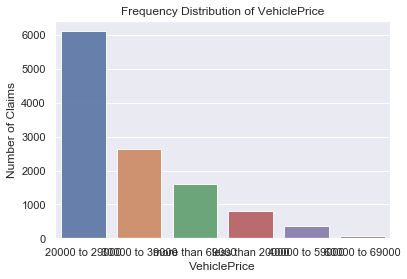

In [4]:
def preliminary(testStr):
    local_count=rawData[testStr].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(local_count.index,local_count.values,alpha=0.9)
    plt.title('Frequency Distribution of '+testStr)
    plt.ylabel('Number of Claims',fontsize=12)
    plt.xlabel(testStr)
    plt.savefig('C:/Users/billz/'+testStr+ '.pdf',transparent=True, bbox_inches='tight')
    plt.show()
preliminary('VehiclePrice')

# Data Preprocessing:

C:\Users\billz\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


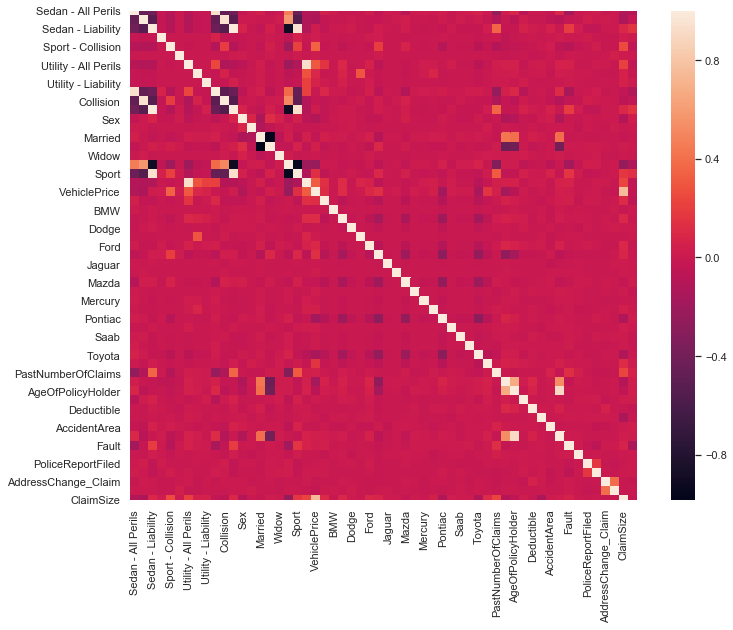

In [5]:
testData=rawData.copy()
testData=testData.drop([testData.columns.tolist()[0],'Year'],axis=1)
def OHRearrange(df,colName):
    lb=LabelBinarizer()
    index=(df.columns.tolist()).index(colName)
    lb_results=lb.fit_transform(df[colName])
    lb_results_df=pd.DataFrame(lb_results,columns=lb.classes_)
    newColNum=len(lb_results_df.columns.tolist())
    result_df=pd.concat([df,lb_results_df],axis=1)
    cols = result_df.columns.tolist()
    result_df=result_df.drop([colName], axis=1)
    cols = result_df.columns.tolist()
    cols=cols[:index]+cols[-newColNum:]+cols[index:-newColNum]
    return result_df[cols]
def averageNA(lst):
    lstlen=len(lst)
    accu=0
    nanlst=lst.isnull()
    for i in range(lstlen):
        if not (nanlst[i] or lst[i]<1):
            accu+=lst[i]
    return accu/lstlen
def averageZERO(lst):
    lstlen=len(lst)
    avg=averageNA(lst)
    nanlst=lst.isnull()
    for i in range (lstlen):
        if (not nanlst[i] and lst[i]<1):
            lst[i]=avg
    return avg
##VehicleCategory
testData=OHRearrange(testData,'VehicleCategory')
testData=OHRearrange(testData,'MaritalStatus')
testData=OHRearrange(testData,'PolicyType')
testData=OHRearrange(testData,'BasePolicy')
testData=OHRearrange(testData,'Make')
##Sex: F-1, M-0
testData['Sex']=testData['Sex'].map({'Female':1,'Male':0})
##AgentType: Internal-1, External-0
testData['AgentType']=testData['AgentType'].map({'Internal':1,'External':0})
##PoliceReportFiled,WitnessPresent
testData['PoliceReportFiled']=testData['PoliceReportFiled'].map({'Yes':1,'No':0})
testData['WitnessPresent']=testData['WitnessPresent'].map({'Yes':1,'No':0})
##Fault: Policyholder-1, Third Party-0
testData['Fault']=testData['Fault'].map({'Policy Holder':1,'Third Party':0})
##DriverRating: we use average rating for the "NA" values in the dataset
testData['DriverRating']=testData['DriverRating'].fillna(averageNA(testData['DriverRating']))
##AccidentArea: Urban-1, Rural-0
testData['AccidentArea']=testData['AccidentArea'].map({'Urban':1,'Rural':0})
##Age
testData['Age']=testData['Age'].fillna(averageZERO(testData['Age']))
##VehiclePrice
VPdict={
    'less than 20000':10000,
    '20000 to 29000':25000,
    '30000 to 39000':35000,
    '40000 to 59000':50000,
    '60000 to 69000':65000,
    'more than 69000': 80000
}
testData['VehiclePrice']=testData['VehiclePrice'].map(VPdict)
##PastNumberOfClaims
PNCdict={
    'none':0,
    '1':1,
    '2 to 4':3,
    'more than 4': 5
}
testData['PastNumberOfClaims']=testData['PastNumberOfClaims'].map(PNCdict)
##AgeOfVehicle
AOVdict={
    'new':0,
    '2 years':2,
    '3 years':3,
    '4 years':4,
    '5 years':5,
    '6 years':6,
    '7 years':7,
    'more than 7':9
}
testData['AgeOfVehicle']=testData['AgeOfVehicle'].map(AOVdict)
##AgeOfPolicyHolder
def AOPHmap(x):
    if x=='over 65':
        return 70
    else:
        return (int(x[:2])+int(x[6:8]))/2
testData['AgeOfPolicyHolder']=testData['AgeOfPolicyHolder'].map(AOPHmap)
##Days_Policy_Claim
testData['Days_Policy_Claim']=testData['Days_Policy_Claim'].map({'more than 30':35,'15 to 30':22.5,'8 to 15':11.5,'none':35})
##AddressChange_Claim
ACCdict={
    'no change':0,
    'under 6 months':0.5,
    '1 year':1,
    '2 to 3 years':2.5,
    '4 to 8 years':6
}
testData['AddressChange_Claim']=testData['AddressChange_Claim'].map(ACCdict)
##NumberOfCars
NOCdict={
    '1 vehicle':1,
    '2 vehicles':2,
    '3 to 4':3.5,
    '5 to 8':6.5,
    'more than 8':9
}
testData['NumberOfCars']=testData['NumberOfCars'].map(NOCdict)
##FraudFound_P
testData['FraudFound_P']=testData['FraudFound_P'].map({0:1,1:-1})
cleanedData=testData.copy()
cleanedData=cleanedData.drop(['RepNumber','PolicyNumber','Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Days_Policy_Accident'],axis=1)
correlation_matrix = cleanedData.corr()

fig = plt.figure(figsize=(12,9))

sns.heatmap(correlation_matrix,square = True)

plt.show()

In [6]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 65 columns):
PolicyNumber            11565 non-null int64
Sedan - All Perils      11565 non-null int32
Sedan - Collision       11565 non-null int32
Sedan - Liability       11565 non-null int32
Sport - All Perils      11565 non-null int32
Sport - Collision       11565 non-null int32
Sport - Liability       11565 non-null int32
Utility - All Perils    11565 non-null int32
Utility - Collision     11565 non-null int32
Utility - Liability     11565 non-null int32
All Perils              11565 non-null int32
Collision               11565 non-null int32
Liability               11565 non-null int32
Sex                     11565 non-null int64
Divorced                11565 non-null int32
Married                 11565 non-null int32
Single                  11565 non-null int32
Widow                   11565 non-null int32
Sedan                   11565 non-null int32
Sport                   11565 non-nu

# Predictive Model: Random Forest

In [7]:
cleanedData=testData.copy()
cleanedData=cleanedData.drop(['RepNumber','PolicyNumber','Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Days_Policy_Accident'],axis=1)
StrProposedList=['ClaimSize','Fault','Age','DriverRating','Deductible','VehiclePrice','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','AddressChange_Claim']
ProposedList=cleanedData[StrProposedList]
ProposedList=(ProposedList-ProposedList.min())/(ProposedList.max()-ProposedList.min())
features=ProposedList
target=cleanedData['FraudFound_P']
X_train, X_test, y_train, y_test =train_test_split(features, target,test_size=0.3) # 70% training and 30% test

In [8]:
##Random Forest
rf = ensemble.RandomForestClassifier(
    n_estimators=5,
    criterion="gini",
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features="auto",
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=1,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight={1:1,-1:1},
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Result and Accuracy Check

0.5
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       222
           1       0.94      1.00      0.97      3248

   micro avg       0.94      0.94      0.94      3470
   macro avg       0.47      0.50      0.48      3470
weighted avg       0.88      0.94      0.91      3470

Accuracy: 0.9360230547550432


C:\Users\billz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\billz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\billz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


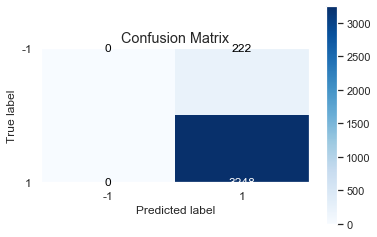

In [9]:
print(roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

               feature  importance
1                Fault    0.346948
0            ClaimSize    0.121439
4           Deductible    0.099233
6   PastNumberOfClaims    0.097974
9  AddressChange_Claim    0.091593
2                  Age    0.073466
8    AgeOfPolicyHolder    0.071186
5         VehiclePrice    0.054714
3         DriverRating    0.022235
7         AgeOfVehicle    0.021211


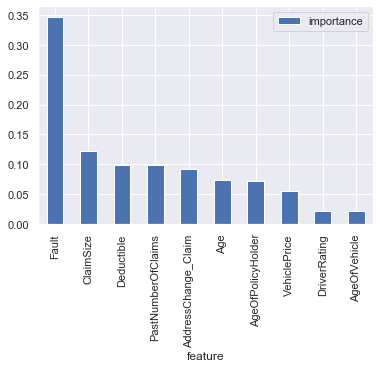

In [10]:
fi = rf.feature_importances_
feature_cols = X_test.columns
importance = pd.DataFrame(
    {"feature": feature_cols, "importance": rf.feature_importances_}
)
importance.sort_values(
    by="importance",
    axis=0,
    ascending=False,
    inplace=True,
    kind="quicksort",
    na_position="last",
)
importance[:20].plot(x="feature", y="importance", kind="bar")
print(importance[:20])

Visualization of the RF

In [11]:
export_graphviz(rf.estimators_[3], 
                out_file='altra.dot', 
                feature_names = StrProposedList,
                class_names = 'FraudFound_P',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

$$

$$

# Predictive Model: Balanced Random Forest

In [40]:
cleanedData=testData.copy()
cleanedData=cleanedData.drop(['RepNumber','PolicyNumber','Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Days_Policy_Accident'],axis=1)
StrProposedList=['ClaimSize','Fault','Age','DriverRating','Deductible','VehiclePrice','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','AddressChange_Claim','FraudFound_P']
ProposedList=cleanedData[StrProposedList]
features=ProposedList.drop(['FraudFound_P'],axis=1)
target=cleanedData['FraudFound_P']
X_train, X_test, y_train, y_test =train_test_split(features, target,test_size=0.3) # 70% training and 30% test
##Balanced Random Forest
brf = BalancedRandomForestClassifier(
    n_estimators=500, 
    criterion='gini', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=False, 
    sampling_strategy=1/1.75, 
    replacement=True, 
    n_jobs=1, 
    random_state=None, 
    verbose=0, 
    warm_start=False, 
    class_weight={1:1.5,-1:1}
)
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)
y_score=brf.predict_proba(X_test)

0.6232398311731968
              precision    recall  f1-score   support

          -1       0.11      0.48      0.18       205
           1       0.96      0.76      0.85      3265

   micro avg       0.75      0.75      0.75      3470
   macro avg       0.54      0.62      0.52      3470
weighted avg       0.91      0.75      0.81      3470

Confusion matrix, without normalization
[[  99  106]
 [ 772 2493]]
Accuracy: 0.7469740634005764


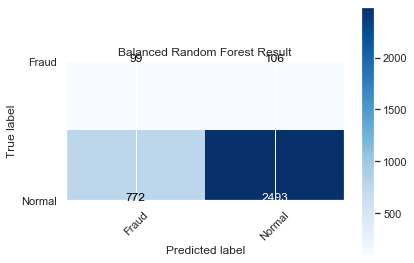

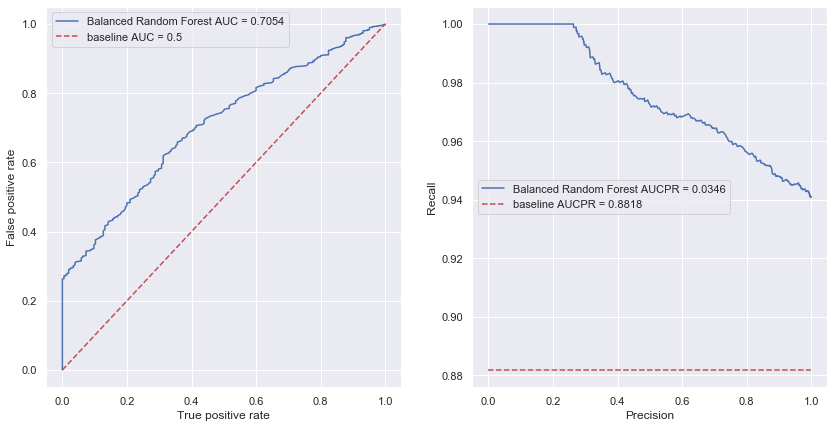

None


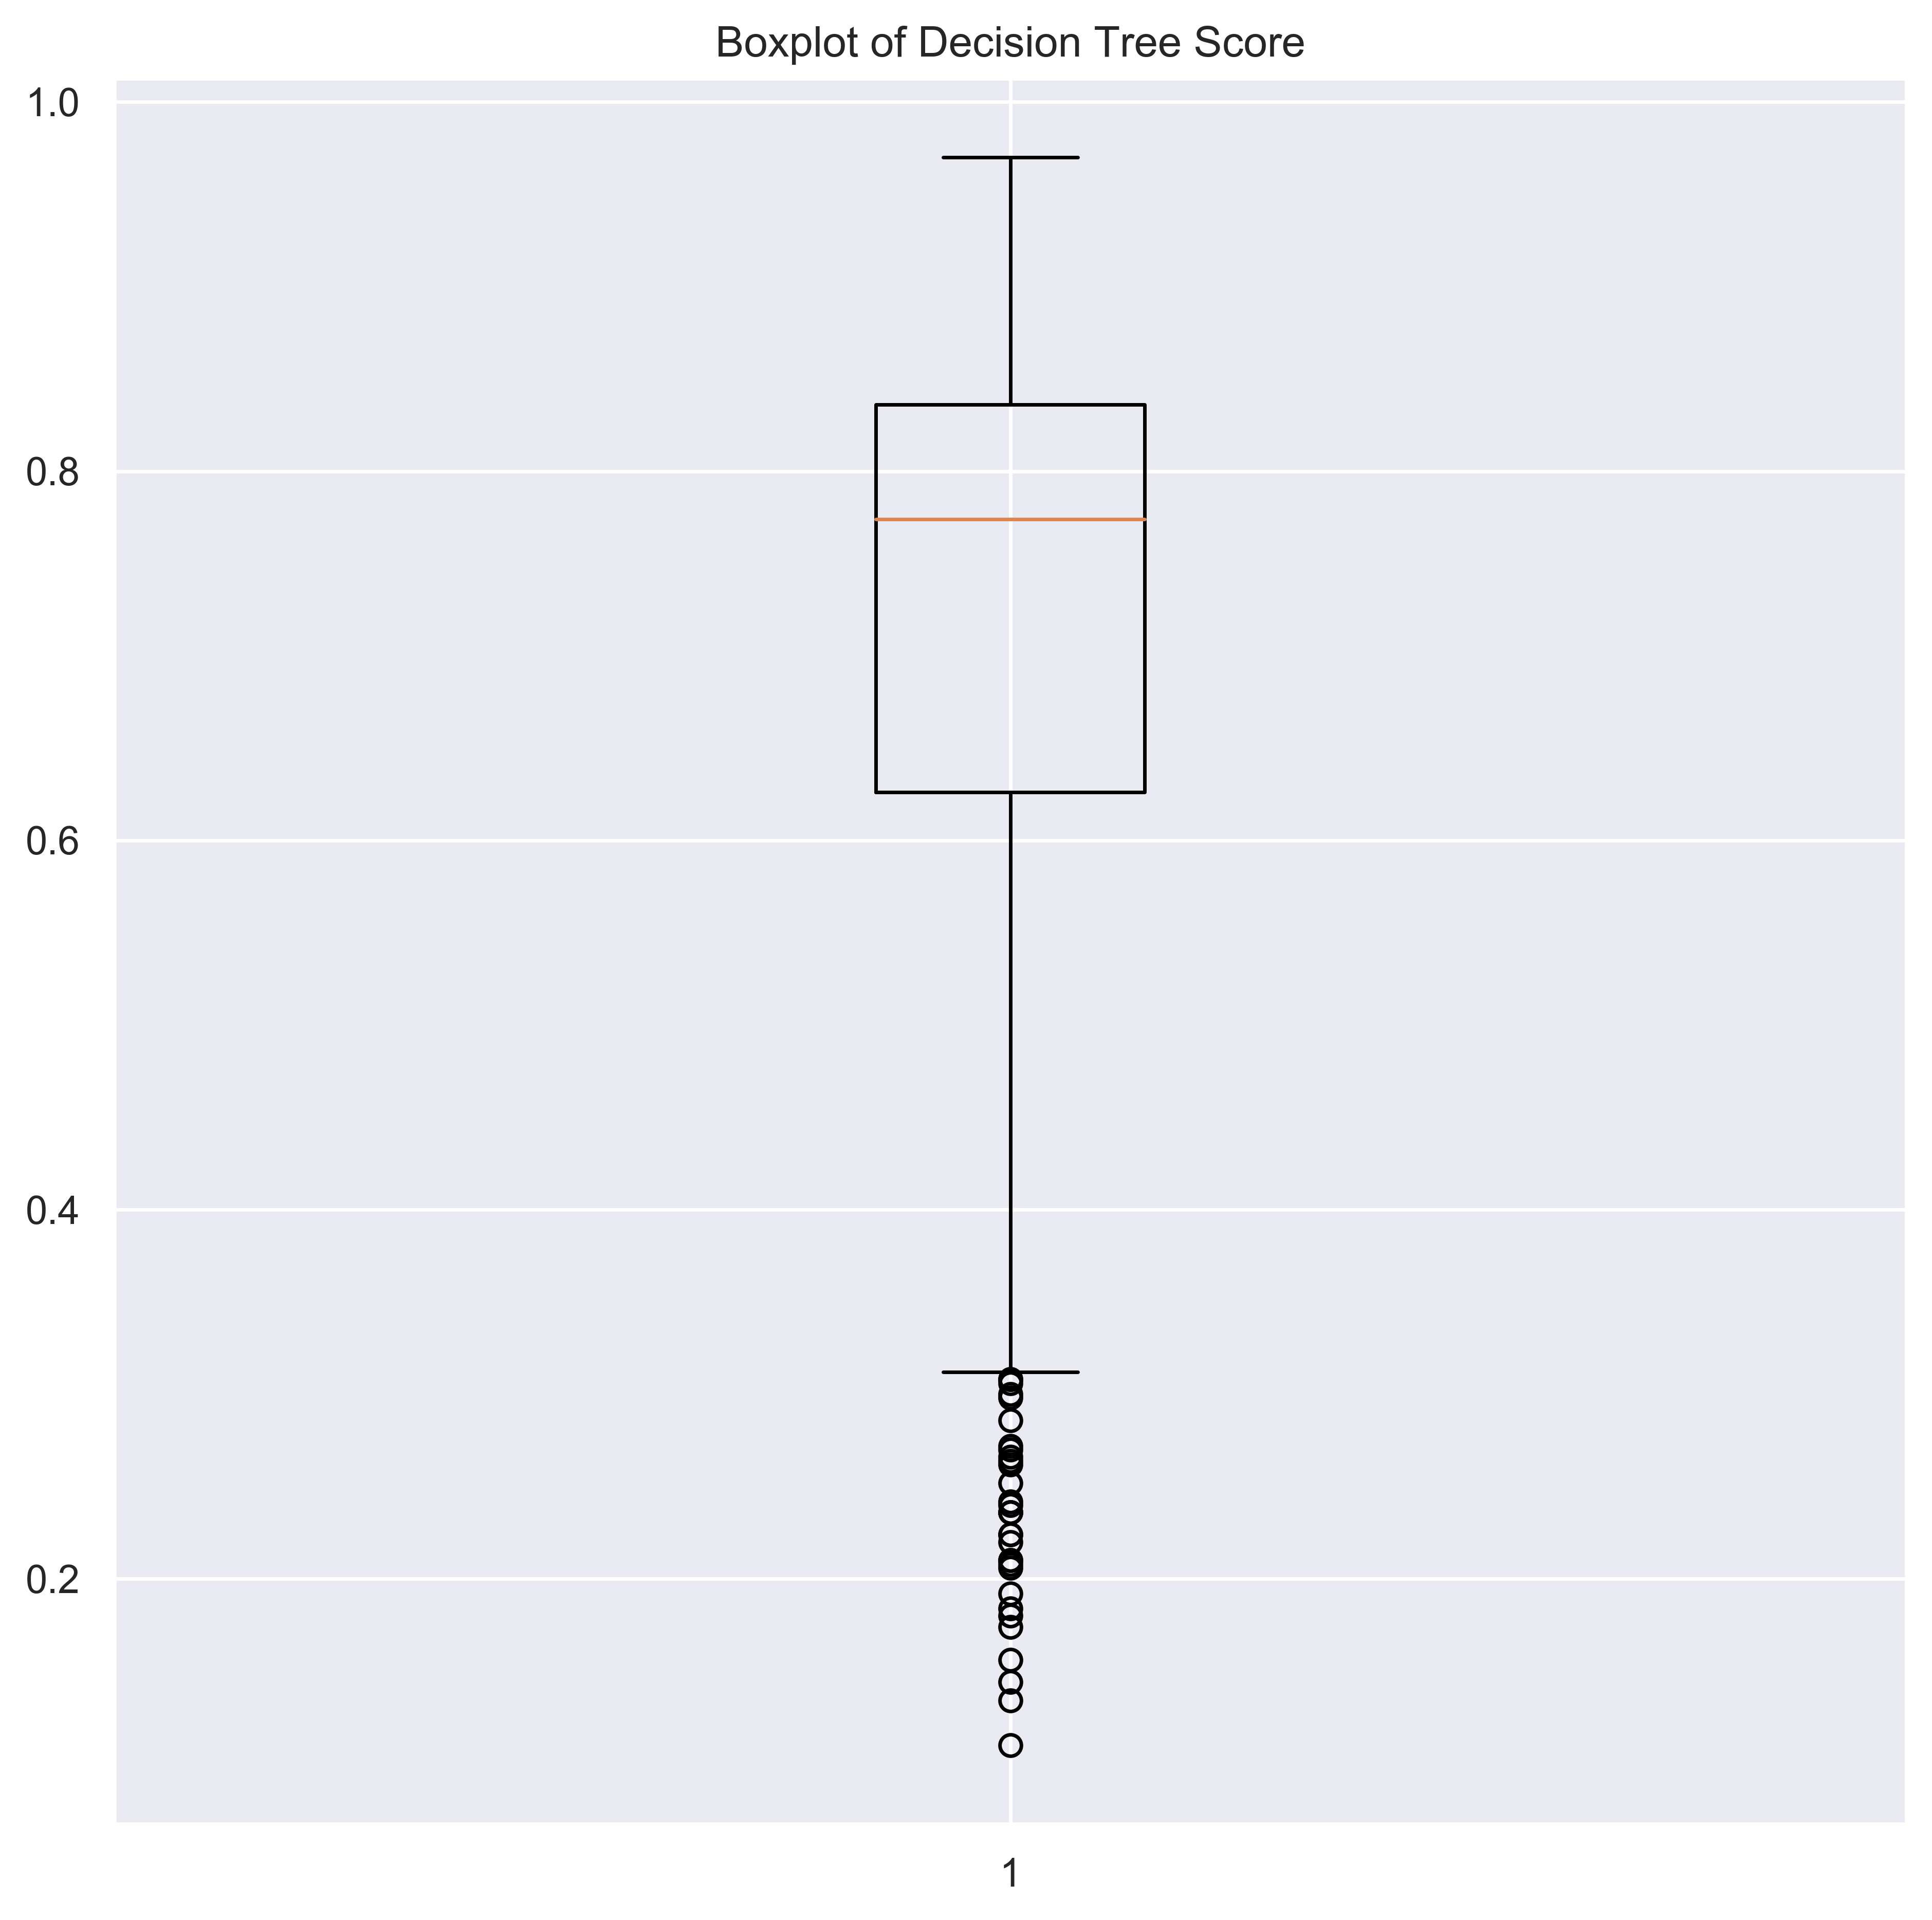

Min: 0.110
Q1: 0.626
Median: 0.774
Q3: 0.836
Max: 0.970
684
513
342
170
0
8560
1083
394
182
0


In [13]:
print(roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,classes=['Fraud','Normal'],title='Balanced Random Forest Result')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
sk_predictions = pd.DataFrame({
    "predicted_class":y_pred,
    "class": y_test,
    "predict": -y_score[:,0]
})
figure()
axes = prediction_summary(
    sk_predictions["class"], sk_predictions["predict"],"Balanced Random Forest")


effective_features=pd.concat([features,target],axis=1)
effective_features=effective_features[effective_features['FraudFound_P']==-1]
effective_features_partial=effective_features.drop(['FraudFound_P'],axis=1)

test_score=brf.predict_proba(effective_features_partial)[:,0]
print(test_score.sort())
plt.figure(figsize=(9, 9), dpi=500)
plt.boxplot(test_score)
plt.title('Boxplot of Decision Tree Score')
plt.show()

from numpy import percentile
# calculate quartiles
quartiles = percentile(test_score, [25, 50, 75])
# calculate min/max
data_min, data_max = test_score.min(), test_score.max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)



for i in [data_min,quartiles[0],quartiles[1],quartiles[2],data_max]:
    print(len(effective_features[brf.predict_proba(effective_features_partial)[:,0]>i]['FraudFound_P']))
    
for i in [data_min,quartiles[0],quartiles[1],quartiles[2],data_max]:
    print(len(ProposedList[brf.predict_proba(features)[:,0]>i]['FraudFound_P']))

In [54]:
y_overall=brf.predict(features)
y_overall=y_overall.tolist()
X_overall=cleanedData.copy()
X_overall=X_overall['ClaimSize'].tolist()
y_actual=cleanedData.copy()
y_actual=y_actual['FraudFound_P'].tolist()
def ClaimSizeSummation(x,y):
    ClaimSizeSum=0
    for i in range(len(y)):
        if y[i]==-1 and y[i]==y_actual[i]:
            ClaimSizeSum+=x[i]
    return ClaimSizeSum
total_result=0
for i in range(len(X_overall)):
    if y_actual[i]==-1:
        total_result+=X_overall[i]
print('Total Identified Fraud Claims in Dollar Amount='+str(ClaimSizeSummation(X_overall,y_overall)))
print('Total Fraud Claims in Dollar Amount='+str(total_result))
print('Identified Fraud Claim Proportion(%)='+str((ClaimSizeSummation(X_overall,y_overall)/total_result)*100)+'%')

Total Identified Fraud Claims in Dollar Amount=14751902.715705976
Total Fraud Claims in Dollar Amount=17242718.40012617
Identified Fraud Claim Proportion(%)=85.55439098047343%


In [14]:
print(effective_features)
print()
print(ProposedList)
def generate_record(feature):
    previous=data_min
    FraudRecord={}
    for i in list([quartiles[0],quartiles[1],quartiles[2],data_max]):
        updatedString='(Fraud) '+feature+' Probability Score Between ['+str(previous)+','+str(i)+'):'
        total=effective_features[brf.predict_proba(effective_features_partial)[:,0]<i][feature].sum()+effective_features[brf.predict_proba(effective_features_partial)[:,0]>=previous][feature].sum()\
        -effective_features[feature].sum()
        OAlength=len(effective_features[brf.predict_proba(effective_features_partial)[:,0]<i][feature])+len(effective_features[brf.predict_proba(effective_features_partial)[:,0]>=previous][feature])-len(effective_features[feature])
        FraudRecord[updatedString]=total/OAlength
        previous=i
    for i in FraudRecord:
        print(i,FraudRecord[i])
    previous=data_min
    OverallRecord={}
    for i in list([quartiles[0],quartiles[1],quartiles[2],data_max]):
        updatedString='(Overall) '+feature+' with Probability Score Between ['+str(previous)+','+str(i)+'):'
        total=ProposedList[brf.predict_proba(features)[:,0]<i][feature].sum()\
                           +ProposedList[brf.predict_proba(features)[:,0]>=previous][feature].sum()\
                           -ProposedList[feature].sum()       
        OAlength=len(ProposedList[brf.predict_proba(features)[:,0]<i][feature])+len(ProposedList[brf.predict_proba(features)[:,0]>=previous][feature])-len(ProposedList[feature])
        OverallRecord[updatedString]=total/OAlength
        previous=i
    for i in OverallRecord:
        print(i,OverallRecord[i])

          ClaimSize  Fault        Age  DriverRating  Deductible  VehiclePrice  \
19     64194.696350      1  39.882317           1.0         400         80000   
37     61043.348010      1  21.000000           4.0         400         80000   
73      5097.074524      1  38.000000           2.0         400         25000   
75     50754.804030      1  31.000000           1.0         400         80000   
88      1063.262958      1  68.000000           3.0         400         25000   
89     69029.591400      1  39.882317           3.0         400         80000   
107     9595.953938      1  39.000000           3.0         400         35000   
118    51335.829060      1  33.000000           3.0         400         80000   
143    50130.999460      1  43.000000           2.0         400         35000   
146    63282.714370      1  39.000000           3.0         400         80000   
153     2488.549524      0  41.000000           3.0         500         10000   
155    55309.920740      1  

In [15]:
for i in ProposedList:
    generate_record(i)

(Fraud) ClaimSize Probability Score Between [0.11,0.626): 26851.067262034514
(Fraud) ClaimSize Probability Score Between [0.626,0.774): 27999.60178559644
(Fraud) ClaimSize Probability Score Between [0.774,0.836): 20639.139756172095
(Fraud) ClaimSize Probability Score Between [0.836,0.97): 25376.199252708087
(Overall) ClaimSize with Probability Score Between [0.11,0.626): 23757.464680875175
(Overall) ClaimSize with Probability Score Between [0.626,0.774): 27825.714349878857
(Overall) ClaimSize with Probability Score Between [0.774,0.836): 22589.053270753244
(Overall) ClaimSize with Probability Score Between [0.836,0.97): 26214.607875366262
(Fraud) Fault Probability Score Between [0.11,0.626): 0.9883040935672515
(Fraud) Fault Probability Score Between [0.626,0.774): 0.9761904761904762
(Fraud) Fault Probability Score Between [0.774,0.836): 0.9883720930232558
(Fraud) Fault Probability Score Between [0.836,0.97): 0.8901734104046243
(Overall) Fault with Probability Score Between [0.11,0.626)

               feature  importance
0            ClaimSize    0.311526
2                  Age    0.203715
3         DriverRating    0.084049
1                Fault    0.078586
7         AgeOfVehicle    0.077482
6   PastNumberOfClaims    0.066486
5         VehiclePrice    0.063082
8    AgeOfPolicyHolder    0.052937
9  AddressChange_Claim    0.033555
4           Deductible    0.028583


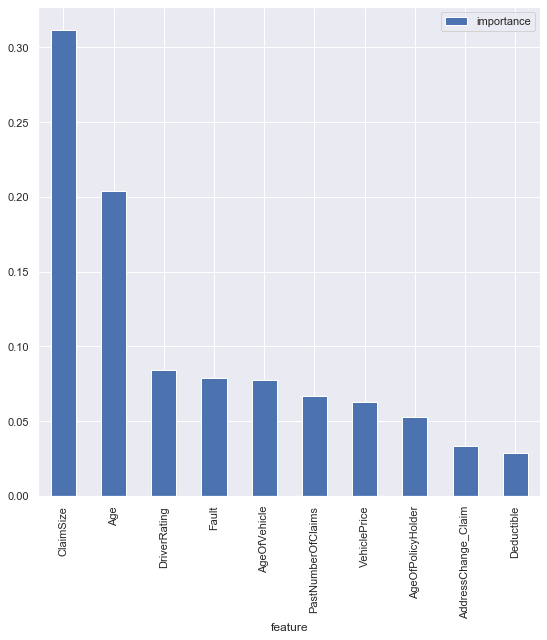

In [16]:
fi = brf.feature_importances_
feature_cols = X_test.columns
importance = pd.DataFrame(
    {"feature": feature_cols, "importance": brf.feature_importances_}
)
importance.sort_values(
    by="importance",
    axis=0,
    ascending=False,
    inplace=True,
    kind="quicksort",
    na_position="last",
)
importance[:20].plot(x="feature", y="importance", kind="bar",figsize=(9,9))
print(importance[:20])

## Feature Exploration 

In [17]:
def sp_feature(feature):
    test_feature1=effective_features_partial.copy()
    test_feature1['Prob Score']=brf.predict_proba(test_feature1)[:,0]
    test_feature2=ProposedList.copy()
    test_feature2=test_feature2[test_feature2['FraudFound_P']==1].drop(['FraudFound_P'],axis=1)
    test_feature2['Prob Score']=brf.predict_proba(test_feature2)[:,0]
    plt.figure(figsize=(9, 6), dpi=500)
    plt.scatter(test_feature2[feature], test_feature2['Prob Score'], color='g',s=10)
    plt.scatter(test_feature1[feature], test_feature1['Prob Score'], color='r',s=20)
    plt.xlabel(feature)
    plt.ylabel('Probability Score')
    plt.show()

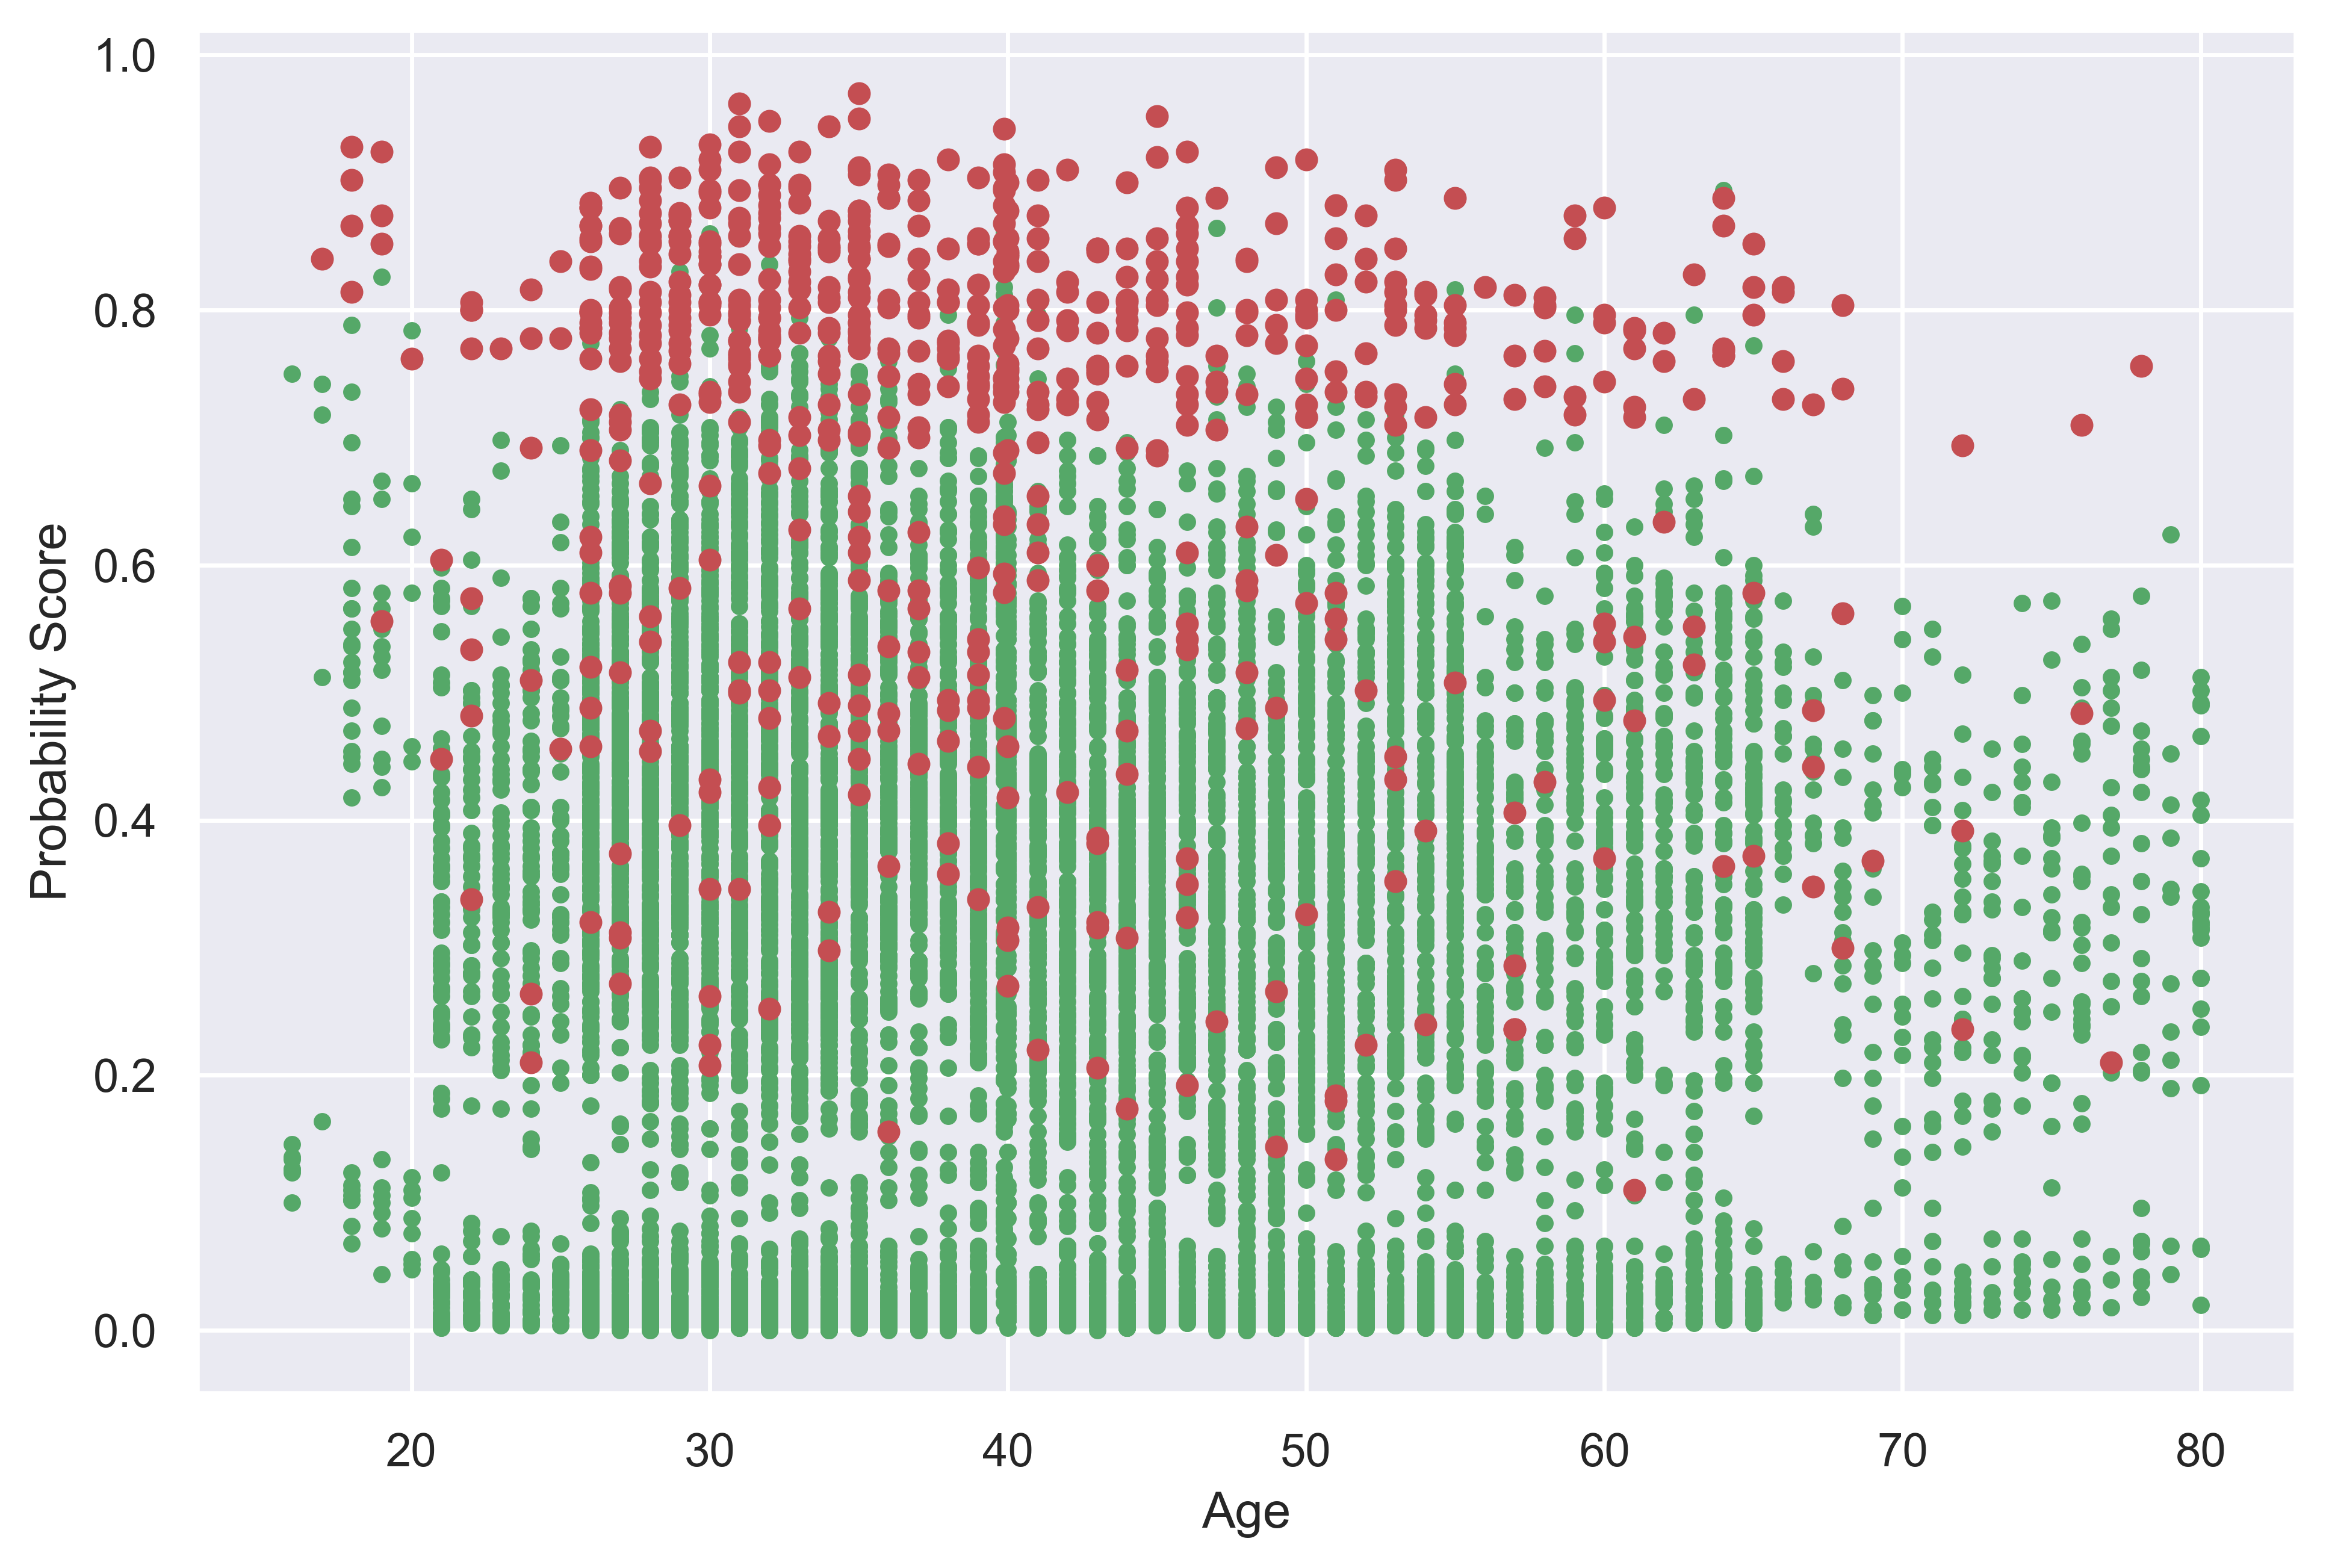

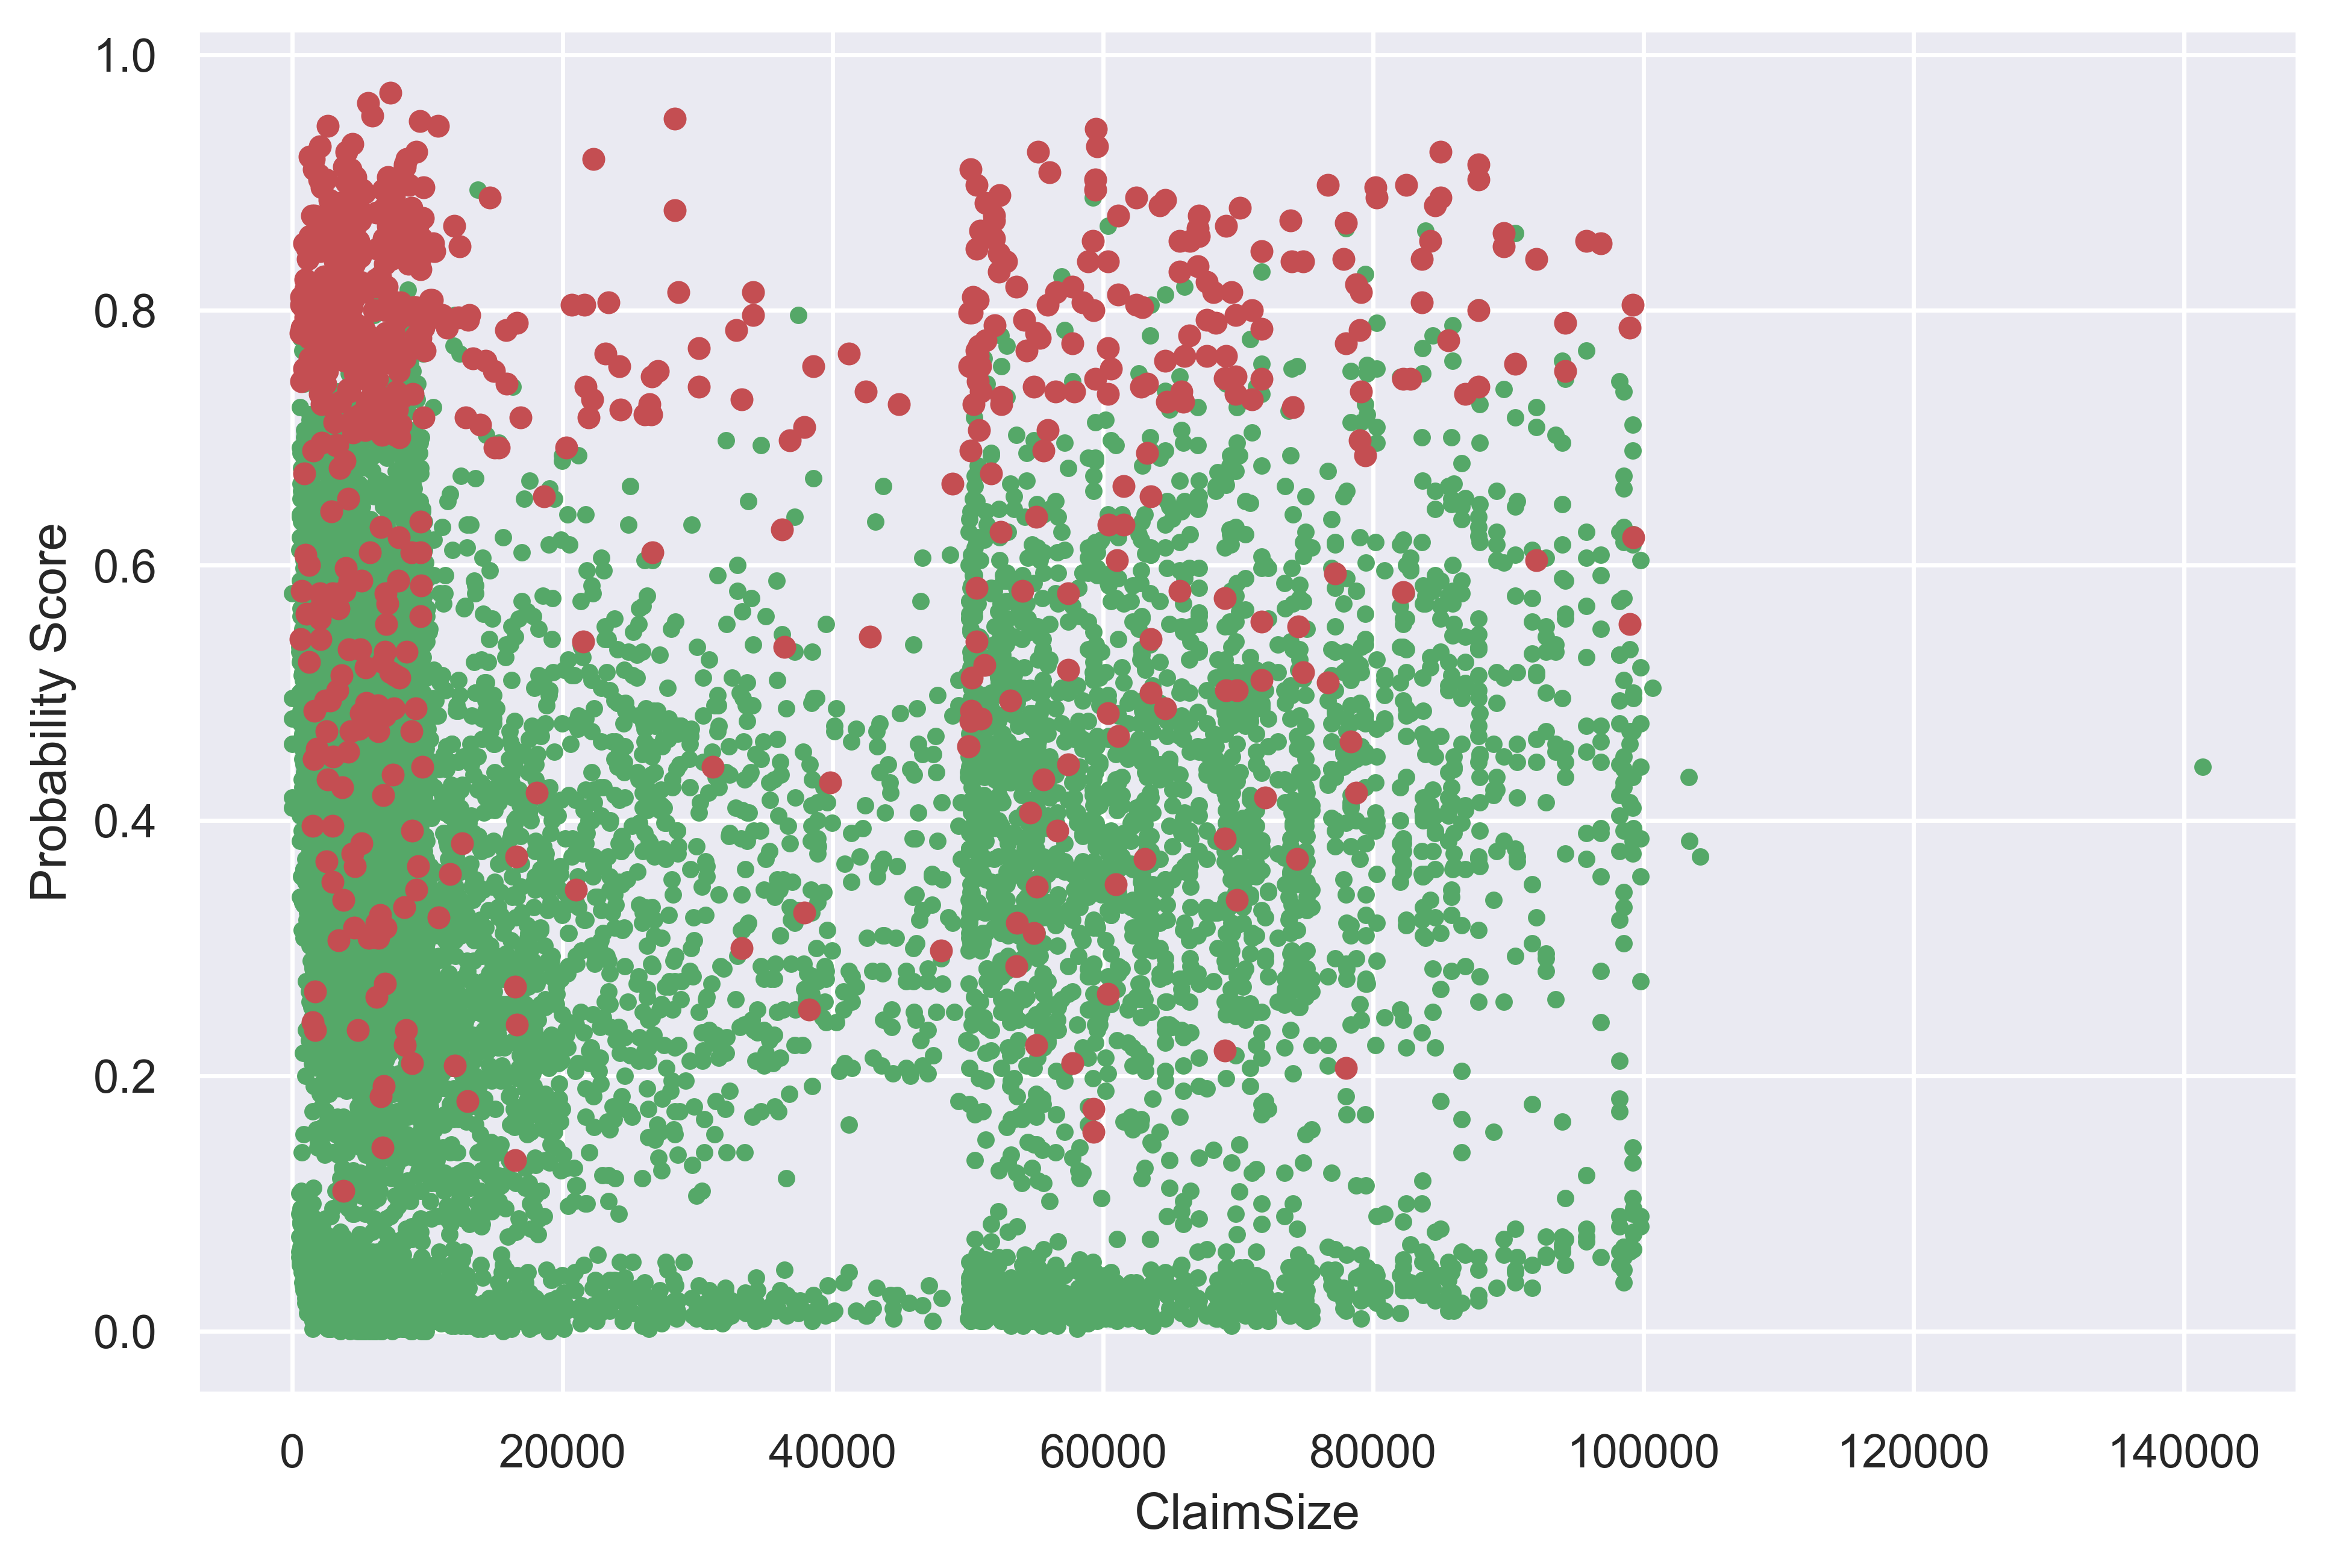

In [18]:
sp_feature('Age')
sp_feature('ClaimSize')

Visualization of the BRF

In [19]:
export_graphviz(brf.estimators_[0], 
                out_file='altra_brf.dot', 
                feature_names = StrProposedList,
                class_names = 'FraudFound_P',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

ValueError: Length of feature_names, 11 does not match number of features, 10

# Before Claim BRF

In [20]:
cleanedData_new=testData.copy()
cleanedData_new=cleanedData_new.drop(['RepNumber','PolicyNumber','Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Days_Policy_Accident'],axis=1)
StrProposedList_new=['Age','DriverRating','Deductible','VehiclePrice','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','AddressChange_Claim','FraudFound_P']
ProposedList_new=cleanedData_new[StrProposedList_new]
features_new=ProposedList_new.drop(['FraudFound_P'],axis=1)
target_new=cleanedData_new['FraudFound_P']
X_train_new, X_test_new, y_train_new, y_test_new =train_test_split(features_new, target_new,test_size=0.3) # 70% training and 30% test
##Balanced Random Forest
brf_new = BalancedRandomForestClassifier(
    n_estimators=500, 
    criterion='gini', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=False, 
    sampling_strategy=1/1.5, 
    replacement=True, 
    n_jobs=1, 
    random_state=None, 
    verbose=0, 
    warm_start=False, 
    class_weight={1:2,-1:1}
)
brf_new.fit(X_train_new, y_train_new)
y_pred_new = brf_new.predict(X_test_new)
y_score_new=brf_new.predict_proba(X_test_new)

0.5668454963125809
              precision    recall  f1-score   support

          -1       0.08      0.41      0.14       203
           1       0.95      0.72      0.82      3267

   micro avg       0.71      0.71      0.71      3470
   macro avg       0.52      0.57      0.48      3470
weighted avg       0.90      0.71      0.78      3470

Confusion matrix, without normalization
[[  83  120]
 [ 899 2368]]
Accuracy: 0.7063400576368876


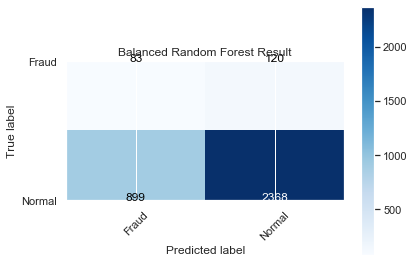

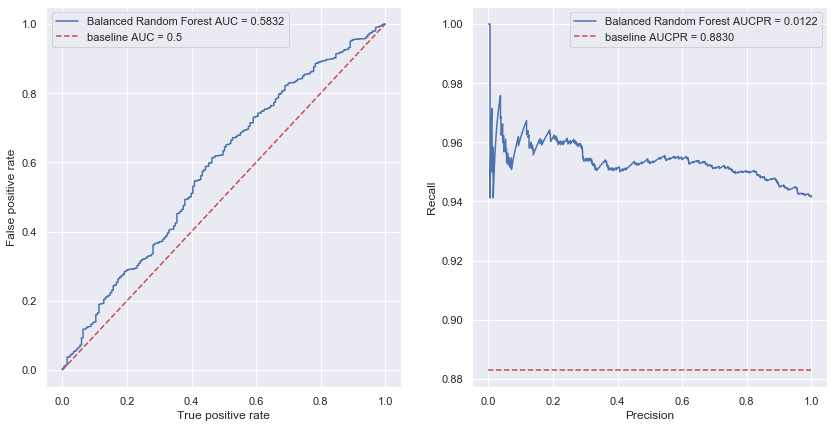

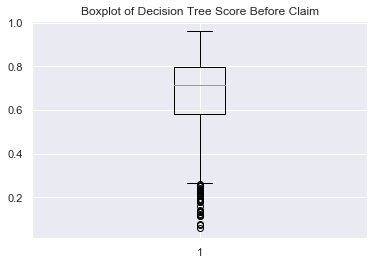

Min: 0.057
Q1: 0.583
Median: 0.713
Q3: 0.797
Max: 0.964
684
513
342
171
0
11505
2149
770
320
0


"\nprevious=0\nclaimFraudRecord={}\nfor i in list([data_min_new,quartiles_new[0],quartiles_new[1],quartiles_new[2],data_max_new]):\n    updatedString='Fraud Claim Size with Probability Score Between ['+str(previous)+','+str(i)+'):'\n    total=effective_features_new[brf_new.predict_proba(effective_features_partial_new)[:,0]<i]['ClaimSize'].sum()+effective_features_new[brf_new.predict_proba(effective_features_partial_new)[:,0]>=previous]['ClaimSize'].sum()    -effective_features_new['ClaimSize'].sum()\n    OAlength=len(effective_features_new[brf_new.predict_proba(effective_features_partial_new)[:,0]<i]['ClaimSize'])+len(effective_features_new[brf_new.predict_proba(effective_features_partial_new)[:,0]>=previous]['ClaimSize'])\n    claimFraudRecord[updatedString]=total/OAlength\n    previous=i\n\nfor i in claimFraudRecord:\n    print(i,claimFraudRecord[i])\n    \nprevious=0\nclaimOverallRecord={}\nfor i in list([data_min_new,quartiles_new[0],quartiles_new[1],quartiles_new[2],data_max_new])

In [21]:
print(roc_auc_score(y_test_new, y_pred_new))
print(classification_report(y_test_new, y_pred_new))
cm_new=confusion_matrix(y_test_new, y_pred_new)
plot_confusion_matrix(cm_new,classes=['Fraud','Normal'],title='Balanced Random Forest Result')
print("Accuracy:",metrics.accuracy_score(y_test_new, y_pred_new))
sk_predictions_new = pd.DataFrame({
    "predicted_class":y_pred_new,
    "class": y_test_new,
    "predict": -y_score_new[:,0]
})
figure()
axes = prediction_summary(
    sk_predictions_new["class"], sk_predictions_new["predict"],"Balanced Random Forest")


effective_features_new=pd.concat([features_new,target_new],axis=1)
effective_features_new=effective_features_new[effective_features_new['FraudFound_P']==-1]
effective_features_partial_new=effective_features_new.drop(['FraudFound_P'],axis=1)

test_score_new=brf_new.predict_proba(effective_features_partial_new)[:,0]
plt.boxplot(test_score_new)
plt.title('Boxplot of Decision Tree Score Before Claim')
plt.show()

from numpy import percentile
# calculate quartiles
quartiles_new = percentile(test_score_new, [25, 50, 75])
# calculate min/max
data_min_new, data_max_new = test_score_new.min(), test_score_new.max()
# print 5-number summary
print('Min: %.3f' % data_min_new)
print('Q1: %.3f' % quartiles_new[0])
print('Median: %.3f' % quartiles_new[1])
print('Q3: %.3f' % quartiles_new[2])
print('Max: %.3f' % data_max_new)



for i in [data_min_new,quartiles_new[0],quartiles_new[1],quartiles_new[2],data_max_new]:
    print(len(effective_features_new[brf_new.predict_proba(effective_features_partial_new)[:,0]>i]['FraudFound_P']))
    
for i in [data_min_new,quartiles_new[0],quartiles_new[1],quartiles_new[2],data_max_new]:
    print(len(ProposedList_new[brf_new.predict_proba(features_new)[:,0]>i]['FraudFound_P']))

'''
previous=0
claimFraudRecord={}
for i in list([data_min_new,quartiles_new[0],quartiles_new[1],quartiles_new[2],data_max_new]):
    updatedString='Fraud Claim Size with Probability Score Between ['+str(previous)+','+str(i)+'):'
    total=effective_features_new[brf_new.predict_proba(effective_features_partial_new)[:,0]<i]['ClaimSize'].sum()+effective_features_new[brf_new.predict_proba(effective_features_partial_new)[:,0]>=previous]['ClaimSize'].sum()\
    -effective_features_new['ClaimSize'].sum()
    OAlength=len(effective_features_new[brf_new.predict_proba(effective_features_partial_new)[:,0]<i]['ClaimSize'])+len(effective_features_new[brf_new.predict_proba(effective_features_partial_new)[:,0]>=previous]['ClaimSize'])
    claimFraudRecord[updatedString]=total/OAlength
    previous=i

for i in claimFraudRecord:
    print(i,claimFraudRecord[i])
    
previous=0
claimOverallRecord={}
for i in list([data_min_new,quartiles_new[0],quartiles_new[1],quartiles_new[2],data_max_new]):
    updatedString='Over all Claim Size with Probability Score Between ['+str(previous)+','+str(i)+'):'
    total=ProposedList[brf_new.predict_proba(features_new)[:,0]<i]['ClaimSize'].sum()\
                       +ProposedList_new[brf_new.predict_proba(features_new)[:,0]>=previous]['ClaimSize'].sum()\
                       -ProposedList_new['ClaimSize'].sum()       
    OAlength=len(ProposedList_new[brf_new.predict_proba(features_new)[:,0]<i]['ClaimSize'])+len(ProposedList_new[brf_new.predict_proba(features_new)[:,0]>=previous]['ClaimSize'])
    claimOverallRecord[updatedString]=total/OAlength
    previous=i

for i in claimOverallRecord:
    print(i,claimOverallRecord[i])
'''

               feature  importance
0                  Age    0.397645
1         DriverRating    0.129000
3         VehiclePrice    0.122601
5         AgeOfVehicle    0.117530
4   PastNumberOfClaims    0.111840
6    AgeOfPolicyHolder    0.069256
7  AddressChange_Claim    0.030555
2           Deductible    0.021573


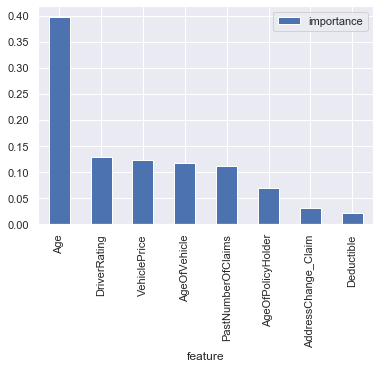

In [22]:
fi_new = brf_new.feature_importances_
feature_cols_new = X_test_new.columns
importance_new = pd.DataFrame(
    {"feature": feature_cols_new, "importance": brf_new.feature_importances_}
)
importance_new.sort_values(
    by="importance",
    axis=0,
    ascending=False,
    inplace=True,
    kind="quicksort",
    na_position="last",
)
importance_new[:20].plot(x="feature", y="importance", kind="bar")
print(importance_new[:20])

# Predictive Model: Isolated Forest

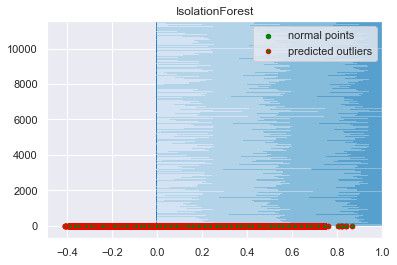

In [23]:
cleanedData=testData.copy()
cleanedData=cleanedData.drop(['RepNumber','PolicyNumber','Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Days_Policy_Accident'],axis=1)
StrProposedList=['ClaimSize','Fault','Age','DriverRating','Deductible','VehiclePrice','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','AddressChange_Claim']
ProposedList=cleanedData[StrProposedList]
ProposedList=preprocessing.normalize(ProposedList)
cleanedData['FraudFound_P']
##features=cleanedData[featureList[:len(featureList)-1]]##Draft Round
features=ProposedList
target=cleanedData['FraudFound_P']
X_train, X_test, y_train, y_test =train_test_split(features, target,test_size=0.3) # 70% training and 30% test
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
outliers=target.loc[target==1]
outlier_index=list(outliers.index)
pca = PCA(2)
pca.fit(features)
res=pd.DataFrame(pca.transform(features))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()


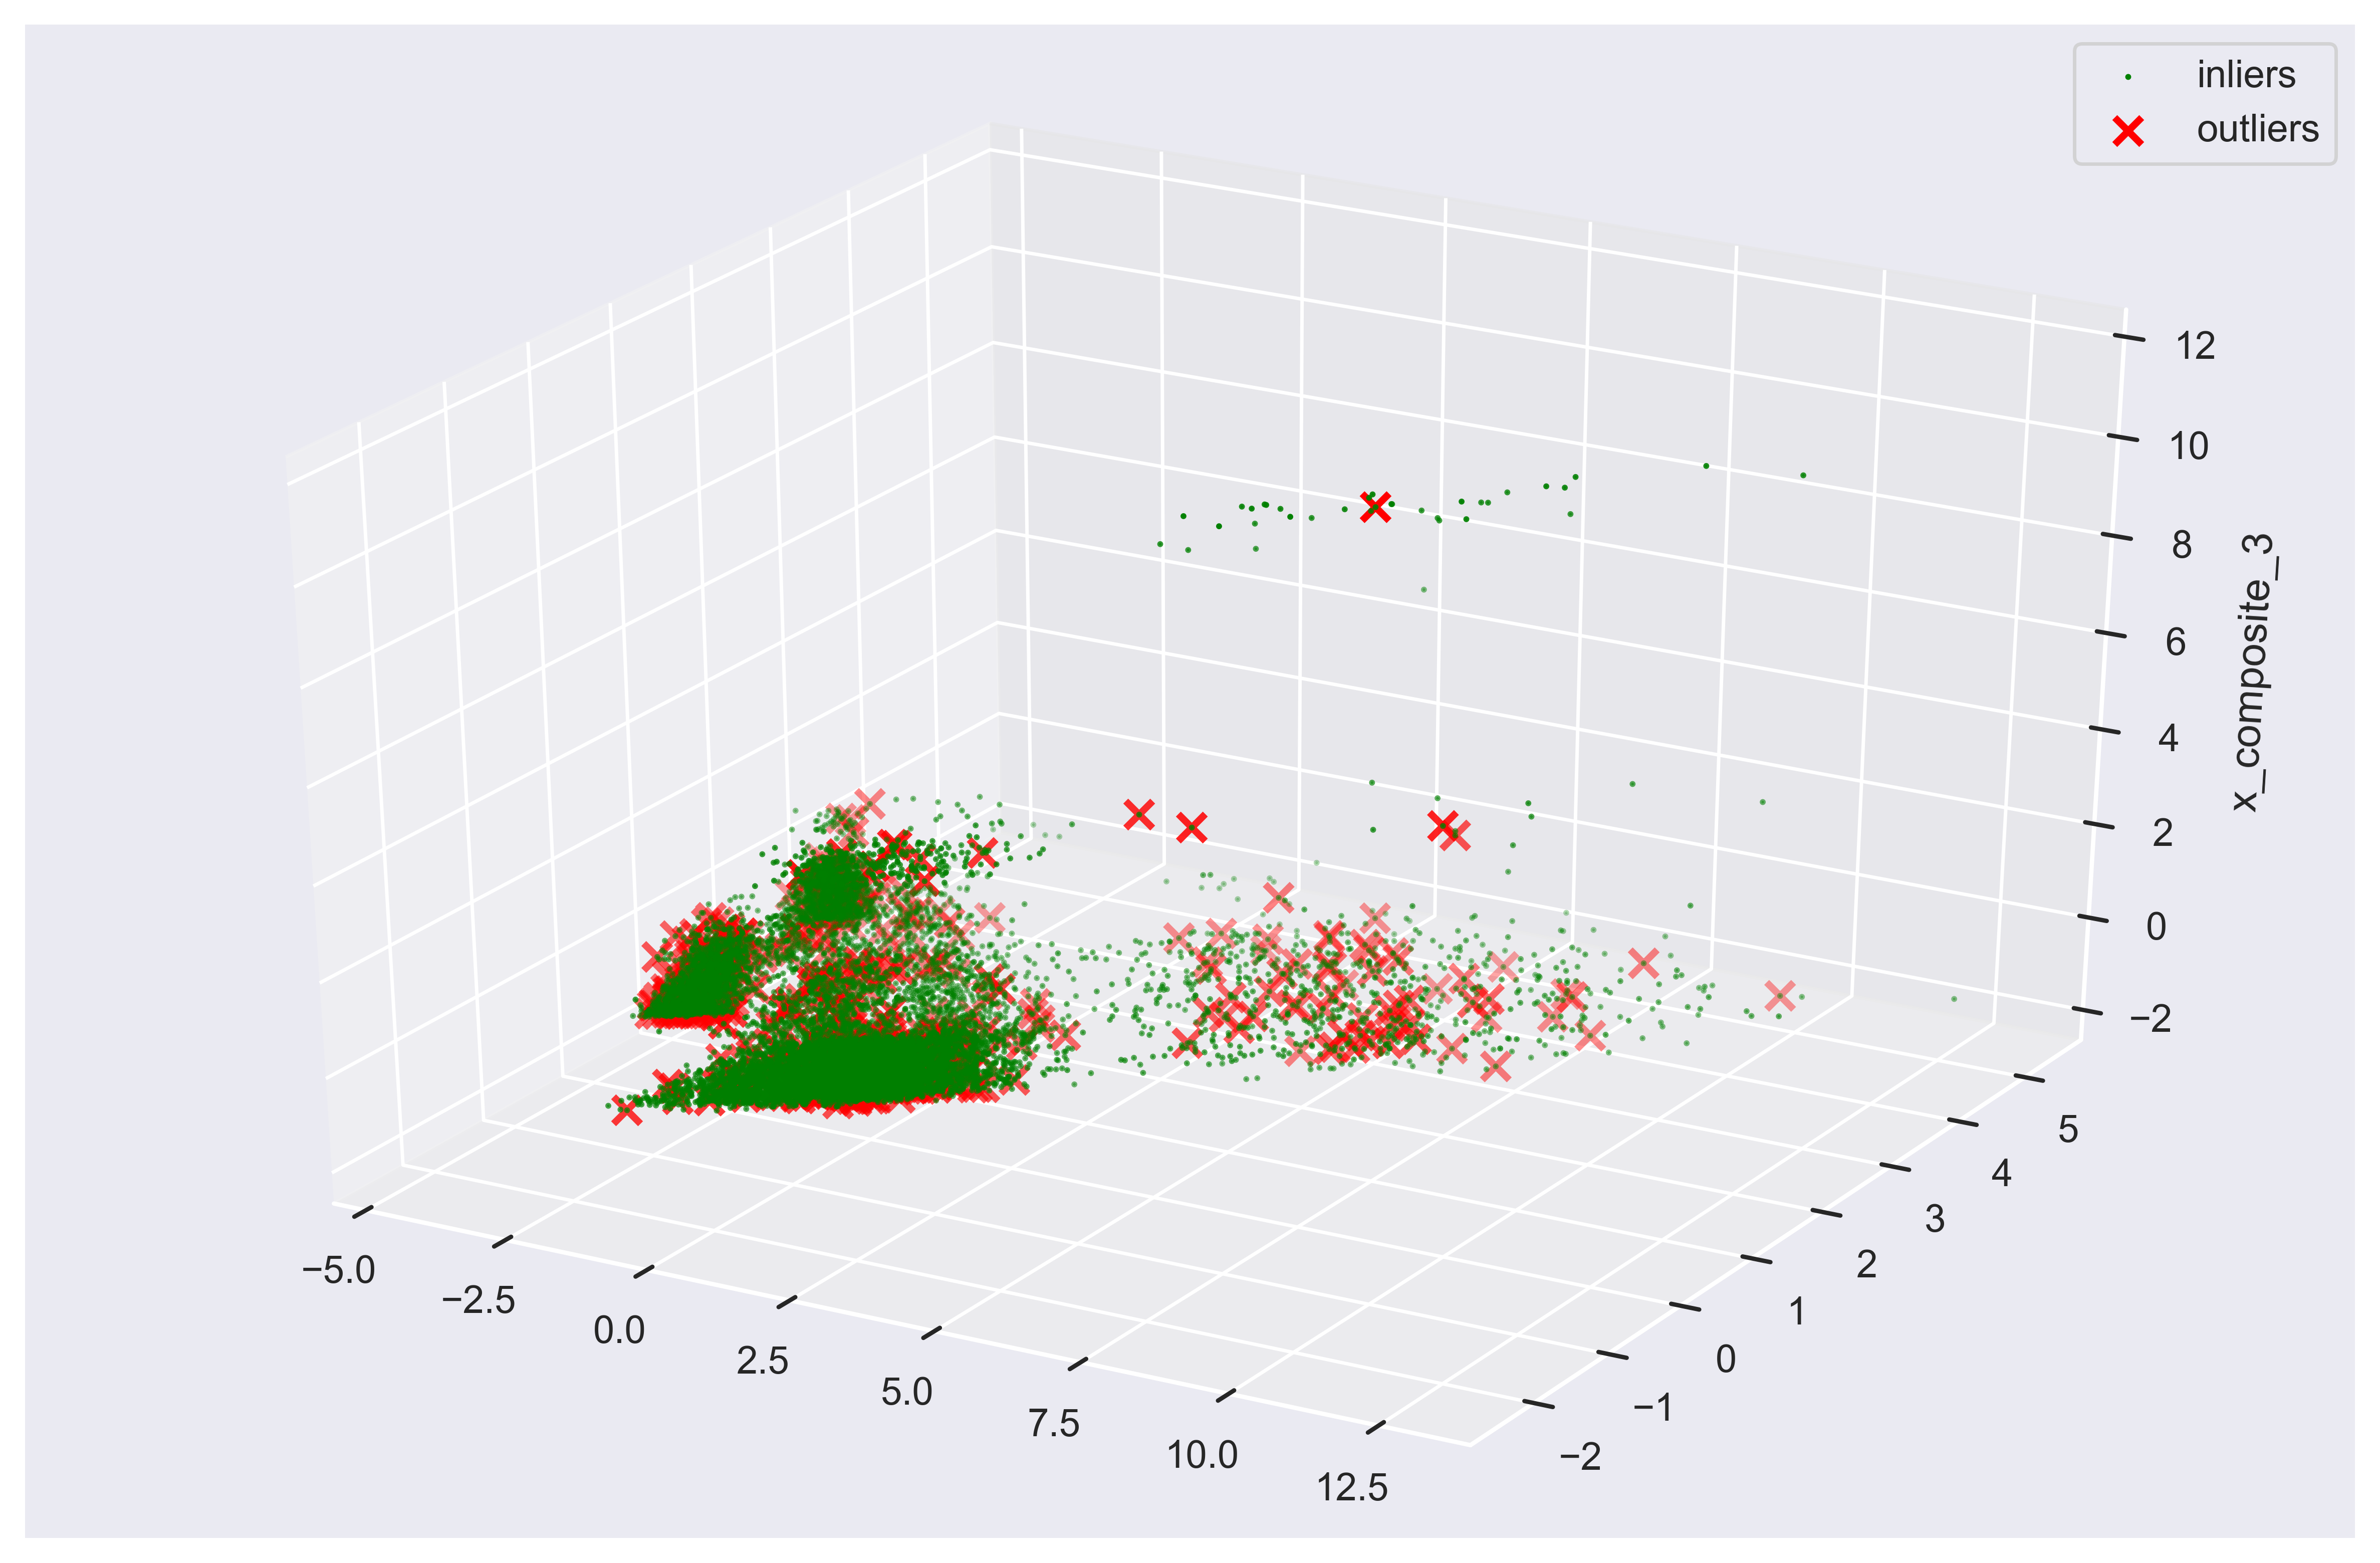

In [24]:
outliers=target.loc[target==-1]
outlier_index=list(outliers.index)
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(features)
X_reduce = pca.fit_transform(X)
fig = plt.figure(figsize=(12, 8), dpi=500)
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=0.5, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

0.5189052252764165
              precision    recall  f1-score   support

          -1       0.08      0.15      0.11       221
           1       0.94      0.88      0.91      3249

   micro avg       0.84      0.84      0.84      3470
   macro avg       0.51      0.52      0.51      3470
weighted avg       0.88      0.84      0.86      3470

Accuracy: 0.837463976945245
AUC: 50.0%


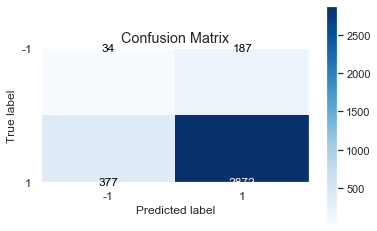

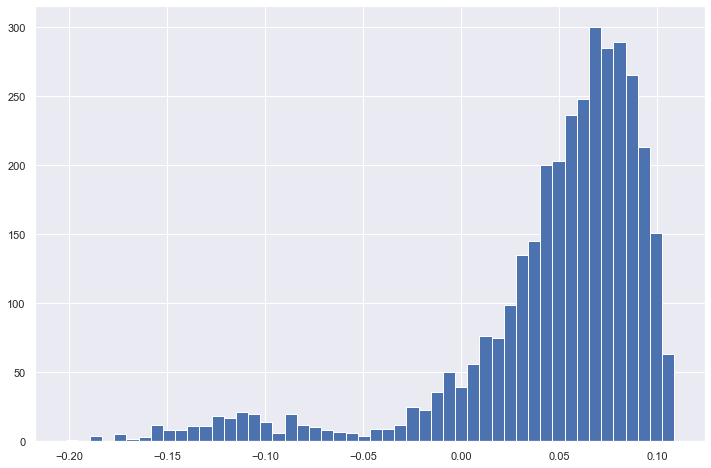

In [25]:
IF=IsolationForest(
    max_samples='auto', 
    contamination=float(.12), 
    n_estimators=500, 
    n_jobs=-1,
    bootstrap=False,
    random_state=42,
    behaviour='new')
IF.fit(X_train,y_train)
y_pred = IF.predict(X_test)
y_score = IF.score_samples(X_test)
print(roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
scores = IF.decision_function(X_test)
plt.figure(figsize=(12, 8))
plt.hist(scores, bins=50);
print("AUC: {:.1%}".format(roc_auc_score((-0.05 < scores),y_test == list(target).index(1))))


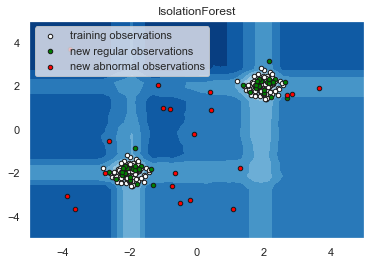

In [27]:
##Sample
# Generate train data
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(behaviour='new', max_samples=100,
                      random_state=rng, contamination='auto')
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

# Alternative Isolation Forest

In [ ]:
cleanedData=testData.copy()
cleanedData=cleanedData.drop(['RepNumber','PolicyNumber','Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Days_Policy_Accident'],axis=1)
StrProposedList=['ClaimSize','Fault','Age','DriverRating','Deductible','VehiclePrice','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','AddressChange_Claim']
ProposedList=cleanedData[StrProposedList]
features=ProposedList
target=cleanedData['FraudFound_P']
X_train, X_test, y_train, y_test =train_test_split(features, target,test_size=0.3) # 70% training and 30% test

x = IsolationForest(random_state=42, contamination=0.15,
                    n_estimators=100, behaviour="new").fit(X_train,y_train)

y_pred = x.predict(X_test)
y_score = x.decision_function(X_test)
sk_predictions = pd.DataFrame({
    "predicted_class": list(map(lambda x: -((x == 1)-1), y_pred)),
    "class": y_test,
    "predict": -y_score
})
print(sk_predictions)
figure()
axes = prediction_summary(
    sk_predictions["class"], sk_predictions["predict"], "sklearn")


print(classification_report(y_test, list(map(lambda x: 1*(x == 1), y_pred)), target_names=['Normal', 'Fraud']))
print("AUC: ", "{:.1%}".format(roc_auc_score(y_test, list(map(lambda x: 1*(x == 1), y_pred)))))
skplt.metrics.plot_confusion_matrix(y_test, list(map(lambda x: 1*(x == 1), y_pred)), title="IF Confusion Matrix")

## Predictive Model:Gradient Boosting Classifier

In [ ]:
cleanedData=testData.copy()
cleanedData=cleanedData.drop(['RepNumber','PolicyNumber','Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Days_Policy_Accident'],axis=1)
StrProposedList=['ClaimSize','Fault','Age','DriverRating','Deductible','VehiclePrice','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','AddressChange_Claim']
ProposedList=cleanedData[StrProposedList]
ProposedList=pd.DataFrame(preprocessing.normalize(ProposedList))
cleanedData['FraudFound_P']
##features=cleanedData[featureList[:len(featureList)-1]]##Draft Round
features=ProposedList
target=cleanedData['FraudFound_P']
X_train, X_test, y_train, y_test =train_test_split(features, target,test_size=0.3) # 70% training and 30% test
clf = GradientBoostingClassifier(
    loss="deviance",
    learning_rate=0.1,
    n_estimators=500,
    subsample=1.0,
    criterion="friedman_mse",
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    init=None,
    random_state=None,
    max_features=None,
)
model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)